<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Colab/blob/main/Tarea14_Garc%C3%ADa_Cajero_Sara_Elizabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos bibliotecas
import pandas as pd
import numpy as np
import io

In [ ]:
from google.colab import files#Cargamos archivos desde el dusco duro de g.colab
data=files.upload()

Saving data.csv to data.csv


In [ ]:
datos=pd.read_csv("data.csv", encoding='cp1252')#Sirve para abrir el archivo directamente en un DataFrame

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
datos.head(5)#Imprime las primeras 5 filas del conjunto de datos

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
datos.shape#Devuelve un número de filas y columnas en un conjunto de datos

(435742, 13)

In [ ]:
datos.isnull().sum()#Devuelve un número de valores nulos en cada columna.

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
datos.info()#Devuelve rango, columna, número de objetos no nulos de cada columna, tipo de datos y uso de memoria.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
datos.count()#Da como resultado una cantidad de valores no nulos en cada columna.

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [ ]:
datos.describe()#Genere estadísticas descriptivas que resuman la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo NaNlos valores.

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
datos=datos.drop(['stn_code'], axis=1) #Se eliminan las columnas que no me sirven para nada
datos=datos.drop(['agency'], axis=1)
datos=datos.drop(['sampling_date'], axis=1)
datos=datos.drop(['location_monitoring_station'], axis=1)

In [ ]:
datos.loc[datos.type=="Industrial Area",'type']='Industrial Areas'

In [ ]:
dato = pd.DataFrame({'Joined date': pd.to_datetime(datos["date"])})

In [ ]:
datos['Year'] = dato['Joined date'].dt.year

In [ ]:
media_SO2=datos['so2'].median()
media_NO2=datos['no2'].median()
media_rspm=datos['rspm'].median()
media_spm=datos['spm'].median()
media_pm2_5=datos['pm2_5'].median()

In [ ]:
datos.so2=datos.so2.fillna(media_SO2)
datos.no2=datos.no2.fillna(media_NO2)
datos.rspm=datos.rspm.fillna(media_rspm)
datos.spm=datos.spm.fillna(media_spm)
datos.pm2_5=datos.pm2_5.fillna(media_pm2_5)

In [ ]:
datos.isnull().sum()

state          0
location       3
type        5393
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           7
Year           7
dtype: int64

In [ ]:
datos2=datos.groupby("state").mean()

In [ ]:
datos2=datos2.reset_index()

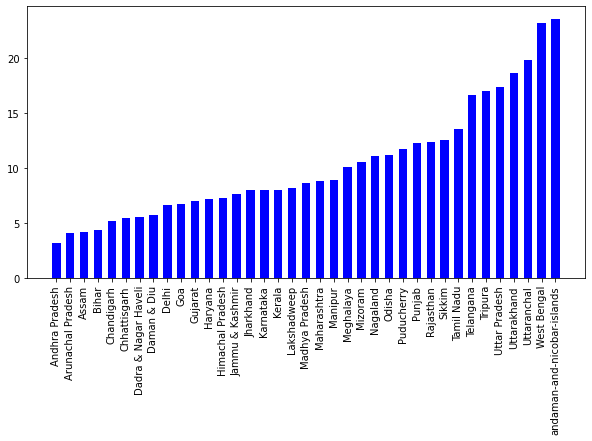

In [ ]:
import matplotlib.pyplot as plt
height= list(datos2['so2'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show()

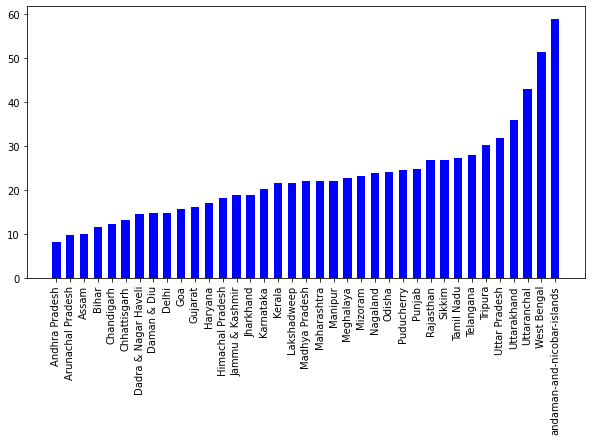

In [ ]:
import matplotlib.pyplot as plt
height= list(datos2['no2'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show()

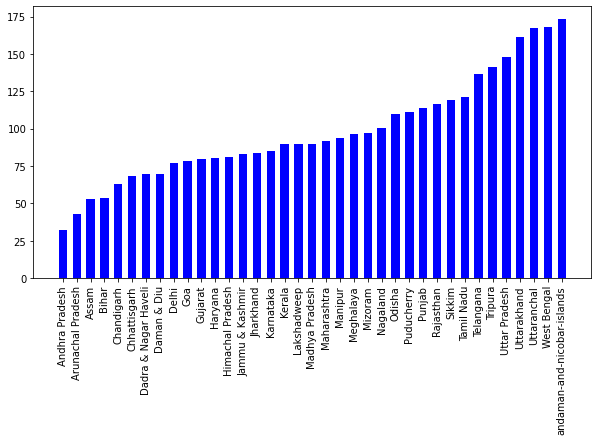

In [ ]:
import matplotlib.pyplot as plt
height= list(datos2['rspm'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show()

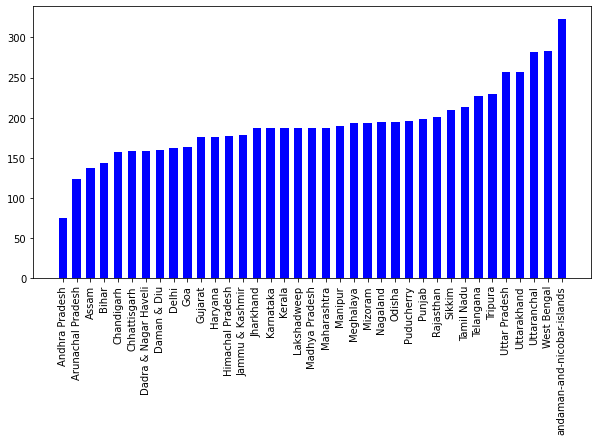

In [ ]:
import matplotlib.pyplot as plt
height= list(datos2['spm'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
datos3=datos[datos["state"]=="Andhra Pradesh"].groupby("Year")

In [ ]:
Datos=datos3.first()
Datos=Datos.reset_index()

In [ ]:
y1 = Datos["so2"]
y2 = Datos["no2"]
x = Datos["Year"]

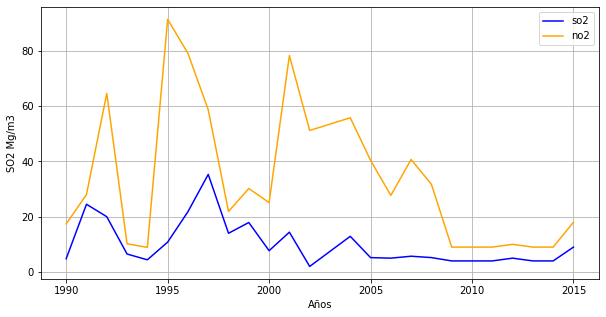

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='so2', color="blue")
plt.plot(x, y2, label='no2', color="orange")
plt.xlabel('Años', fontsize=10)
plt.ylabel('SO2 Mg/m3', fontsize=10)
plt.grid(True)
plt.legend()

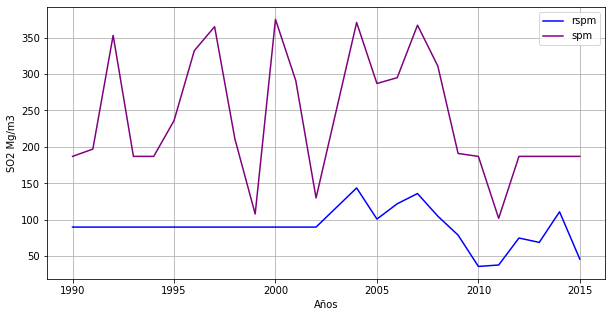

In [ ]:
y1 = Datos["rspm"]
y2 = Datos["spm"]
x = Datos["Year"]
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='rspm', color="blue")
plt.plot(x, y2, label='spm', color="purple")
plt.xlabel('Años', fontsize=10)
plt.ylabel('SO2 Mg/m3', fontsize=10)
plt.grid(True)
plt.legend()